# Data Processing with Pandas 
In this class, we will learn how pandas is used in data processing/cleaning.

## Introduction 

### What is Pandas? 

https://pandas.pydata.org/docs/user_guide/index.html

* Pandas is an open source python package very popular among Data Science practionioners. 
* It is widely used for  data for analysis and model training. 
* If you have not already installed, please uncomment and run the following cell to install packages we are going to use in this class 

In [43]:
!pip install pandas
!pip install numpy
!pip install matplotlib

# Do all of us have these libraries installed ?  

If you ran into problems running jupyter notebook, you can use google collaboratory as well. It is freely accessed from google drive. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
%matplotlib inline

## Warm Up
You learned about lists and dictionaries in python. Now let's see how we can use those along with pandas

## Pandas objects:
    
## Pandas Series & dataframes 

### Pandas Series 

* pd.Series()
* One dimensional arrays with indices. Series are like a column in the excel
* Pandas Series object supports both integer- and label-based indexing 

In [44]:
saarc_countries = [
    'Afghanistan', 'Bangaladesh', 'Bhutan', 'India', 'Maldives', 'Nepal',
    'Pakistan', 'Sri Lanka']

saarc_gdp_per_capita = {
    'Afghanistan': 517,
    'Bangaladesh': 2503,
    'Bhutan': 3245,
    'India': 2290,
    'Maldives': 8995,
    'Nepal': 1223,
    'Pakistan': 1564,
    'Sri Lanka': 4016
}
pd_series_from_list = pd.Series(saarc_countries)
pd_series_from_dict = pd.Series(saarc_gdp_per_capita)

In [53]:
pd_series_from_list

0    Afghanistan
1    Bangaladesh
2         Bhutan
3          India
4       Maldives
5          Nepal
6       Pakistan
7      Sri Lanka
dtype: object

In [54]:
pd_series_from_dict

Afghanistan     517
Bangaladesh    2503
Bhutan         3245
India          2290
Maldives       8995
Nepal          1223
Pakistan       1564
Sri Lanka      4016
dtype: int64

### Slicing the Series

* Syntax is : Series[start:end:step]

In [55]:
pd_series_from_list[2:5:2]

2      Bhutan
4    Maldives
dtype: object

In [56]:
pd_series_from_dict[:2]

Afghanistan     517
Bangaladesh    2503
dtype: int64

Series are cool but we want more! Our data is more complex. 

## DataFrames
* Primary pandas data structure 
* Two-dimensional: can hold multiple pandas series (columns)
series[start:end:step]

In [57]:
saarc_gdp_per_capita

{'Afghanistan': 517,
 'Bangaladesh': 2503,
 'Bhutan': 3245,
 'India': 2290,
 'Maldives': 8995,
 'Nepal': 1223,
 'Pakistan': 1564,
 'Sri Lanka': 4016}

In [58]:
df_test = pd.DataFrame.from_dict(saarc_gdp_per_capita,
                            orient='index').reset_index()

In [59]:
df_test.columns = ['country', 'gdp_per_capita']

In [60]:
df_test

,country,gdp_per_capita
0,Afghanistan,517
1,Bangaladesh,2503
2,Bhutan,3245
3,India,2290
4,Maldives,8995
5,Nepal,1223
6,Pakistan,1564
7,Sri Lanka,4016


In [61]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   country         8 non-null      object
 1   gdp_per_capita  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [62]:
df_test.describe()

,gdp_per_capita
count,8.000000
mean,3044.125000
std,2649.877433
min,517.000000
25%,1478.750000
50%,2396.500000
75%,3437.750000
max,8995.000000


In [63]:
df_test.describe(include=['object'])

,country
count,8
unique,8
top,Afghanistan
freq,1


In [64]:
df_test.head(n=2)

,country,gdp_per_capita
0,Afghanistan,517
1,Bangaladesh,2503


In [65]:
df_test.tail()

,country,gdp_per_capita
3,India,2290
4,Maldives,8995
5,Nepal,1223
6,Pakistan,1564
7,Sri Lanka,4016


## Let's make some fake data 

## scores of students in different subjects

In [17]:
N = 200
np.random.seed(101)
student_ids = [f"STU{i+1:03d}" for i in range(N)]
scores_math = np.random.normal(loc=60, scale=15, size=N)
scores_physics = np.random.normal(loc=65, scale=15, size=N)
scores_chemistry = np.random.normal(loc=50, scale=15, size=N)
scores_biology = np.random.normal(loc=70, scale=15, size=N)
scores_social = np.random.normal(loc=65, scale=15, size=N)
scores_english = np.random.normal(loc=55, scale=15, size=N)

df_scores_science = pd.DataFrame({
    "student_id": student_ids,
    "math": scores_math,
    "physics": scores_physics,
    "chemistry": scores_chemistry,
    "biology": scores_biology
})

df_scores_arts = pd.DataFrame({
    "student_id": student_ids,
    "english": scores_english,
    "social_studies": scores_social})

In [18]:
df_scores_science.head()

,student_id,math,physics,chemistry,biology
0,STU001,100.602748,60.807347,81.276738,52.584204
1,STU002,69.421991,80.940656,45.622675,75.089139
2,STU003,73.619542,91.280216,67.869572,56.544092
3,STU004,67.557386,75.433201,55.109512,76.491621
4,STU005,69.766769,67.304913,31.489137,65.793508


In [19]:
df_scores_arts.head()

,student_id,english,social_studies
0,STU001,64.774407,61.538321
1,STU002,53.878280,44.518799
2,STU003,49.231596,75.226367
3,STU004,61.563825,58.527499
4,STU005,47.364151,68.519956


## Cancatenating/Merging Data Frames 

We created two data frames df_scores_science and df_scores_arts. let's merge those together

In [20]:
## Merging two data frames with common merge keys 
df_scores = pd.merge(df_scores_science,
                     df_scores_arts,
                     on='student_id',
                     how='inner')

In [21]:
df_scores.head()

,student_id,math,physics,chemistry,biology,english,social_studies
0,STU001,100.602748,60.807347,81.276738,52.584204,64.774407,61.538321
1,STU002,69.421991,80.940656,45.622675,75.089139,53.878280,44.518799
2,STU003,73.619542,91.280216,67.869572,56.544092,49.231596,75.226367
3,STU004,67.557386,75.433201,55.109512,76.491621,61.563825,58.527499
4,STU005,69.766769,67.304913,31.489137,65.793508,47.364151,68.519956


Can also concatenate dataframes (append one df on top of the other). Refer to this Pandas documenation
https://pandas.pydata.org/docs/user_guide/merging.html

In [22]:
df_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   student_id      200 non-null    object 
 1   math            200 non-null    float64
 2   physics         200 non-null    float64
 3   chemistry       200 non-null    float64
 4   biology         200 non-null    float64
 5   english         200 non-null    float64
 6   social_studies  200 non-null    float64
dtypes: float64(6), object(1)
memory usage: 12.5+ KB


In [23]:
## This has a lot of information to unpack. Spend some time trying to understand what is printed

In [24]:
df_scores.dtypes

student_id         object
math              float64
physics           float64
chemistry         float64
biology           float64
english           float64
social_studies    float64
dtype: object

Let's say we want all of the scores to be a integer. We can set them to be a integer with following: 

In [25]:
df_scores['math'] = df_scores['math'].astype(int)
df_scores['physics'] = df_scores['physics'].astype(int)

In [26]:
df_scores.dtypes

student_id         object
math                int64
physics             int64
chemistry         float64
biology           float64
english           float64
social_studies    float64
dtype: object

In [27]:
df_scores.describe()

,math,physics,chemistry,biology,english,social_studies
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,60.220000,64.82500,50.080961,69.724234,54.835065,66.113743
std,15.635021,15.85786,16.413752,15.689472,14.337995,15.547012
min,18.000000,23.00000,8.240501,33.245891,19.896893,18.542921
25%,48.000000,53.00000,39.420974,60.600749,45.370198,55.901648
50%,62.000000,65.50000,49.267801,67.974362,53.950890,67.298549
75%,70.000000,77.00000,62.297216,80.060160,66.676246,75.864137
max,100.000000,106.00000,93.323716,115.561698,86.103865,106.666711


## Accessing columns/rows of data 
* Using loc:  Allows indexing and slicing that always references the explicit index
* Using iloc : Allows indexing and slicing that always references the implicit Python-style index:
* Columns can also be directly accessed using column name 

Let's look at some of the examples:


In [28]:
## Select first 3 rows with loc
df_scores.loc[0:2]

,student_id,math,physics,chemistry,biology,english,social_studies
0,STU001,100,60,81.276738,52.584204,64.774407,61.538321
1,STU002,69,80,45.622675,75.089139,53.878280,44.518799
2,STU003,73,91,67.869572,56.544092,49.231596,75.226367


In [66]:
df_scores.loc[100]

student_id                  STU101
math                            84
physics                         43
chemistry                55.372268
biology                  71.543268
english                  55.080736
social_studies           73.053976
physics_grade                    F
chemistry_grade                  D
math_grade                       A
biology_grade                    B
english_grade                    D
social_studies_grade             B
physics grade comment         Fail
Name: 100, dtype: object

In [30]:
## Select first 2 rows with loc
df_scores.iloc[0:2]

,student_id,math,physics,chemistry,biology,english,social_studies
0,STU001,100,60,81.276738,52.584204,64.774407,61.538321
1,STU002,69,80,45.622675,75.089139,53.878280,44.518799


In [31]:
df_scores.iloc[1]

student_id           STU002
math                     69
physics                  80
chemistry         45.622675
biology           75.089139
english            53.87828
social_studies    44.518799
Name: 1, dtype: object

## Conditional Filtering 

* Can filter data on any column/rows with conditional statements for e.g. 

Lets find if there are any students scoring more than 60 on all subjects ? 

In [32]:
df_scores[(df_scores['chemistry'] > 60) & (df_scores['math'] > 60) &
          (df_scores['physics'] > 60) & (df_scores['biology'] > 60) &
          (df_scores['social_studies'] > 60) & (df_scores['english'] > 60)]

,student_id,math,physics,chemistry,biology,english,social_studies
12,STU013,62,83,70.798990,78.015375,74.570204,73.756318
28,STU029,72,83,70.270352,87.269511,79.376987,96.997051
38,STU039,63,63,65.558172,60.482480,68.746078,63.118209
54,STU055,68,76,89.295014,62.656849,71.573417,89.681300
74,STU075,74,71,64.118672,95.328487,71.956127,76.321243
116,STU117,74,66,67.925379,71.623543,83.976118,101.694293
118,STU119,71,71,67.141627,61.255593,67.781391,68.571192
120,STU121,68,62,82.642152,60.266175,82.987230,61.503892


In [68]:
df_scores[(df_scores['chemistry'] > 60) & (df_scores['physics'] > 70)]

,student_id,math,physics,chemistry,biology,english,social_studies,physics_grade,chemistry_grade,math_grade,biology_grade,english_grade,social_studies_grade,physics grade comment
2,STU003,73,91,67.869572,56.544092,49.231596,75.226367,A,C,B,D,F,B,Excellent
12,STU013,62,83,70.798990,78.015375,74.570204,73.756318,A,B,C,B,B,B,Excellent
19,STU020,70,77,68.764299,43.174915,60.530948,38.137862,B,C,B,F,C,F,Good
28,STU029,72,83,70.270352,87.269511,79.376987,96.997051,A,B,B,A,B,A,Excellent
39,STU040,89,75,61.129642,97.354660,46.399892,81.248779,B,C,A,A,F,A,Good
42,STU043,42,88,66.982545,75.845809,56.340128,67.586805,A,C,F,B,D,C,Excellent
54,STU055,68,76,89.295014,62.656849,71.573417,89.681300,B,A,C,C,B,A,Good
56,STU057,46,76,77.396903,67.920139,53.813804,47.226966,B,B,F,C,D,F,Good
74,STU075,74,71,64.118672,95.328487,71.956127,76.321243,B,C,B,A,B,B,Good
89,STU090,51,74,69.425348,45.168039,51.952340,69.710790,B,C,D,F,D,C,Good



* Find scores of the students in Chemisty who scored more than 70 in physics and math but scored less than 50 in biology

In [71]:
df_scores[(df_scores['chemistry'] > 70) & (df_scores['physics'] > 70) &  (df_scores['biology'] < 50)]

,student_id,math,physics,chemistry,biology,english,social_studies,physics_grade,chemistry_grade,math_grade,biology_grade,english_grade,social_studies_grade,physics grade comment
132,STU133,64,71,77.393816,43.349229,49.969274,83.793721,B,B,C,F,F,A,Good


## Row wise operations 

* Apply/Mapping Functions

* Let's cap the highest score to 100  and lowest score to 0 in all the subjects

In [33]:
highest = 100
lowest = 0
df_scores['math'] = df_scores['math'].apply(
    lambda x: np.clip(x, lowest, highest))
df_scores['physics'] = df_scores['physics'].apply(
    lambda x: np.clip(x, lowest, highest))
df_scores['chemistry'] = df_scores['chemistry'].apply(
    lambda x: np.clip(x, lowest, highest))
df_scores['biology'] = df_scores['biology'].apply(
    lambda x: np.clip(x, lowest, highest))
df_scores['social_studies'] = df_scores['social_studies'].apply(
    lambda x: np.clip(x, lowest, highest))
df_scores['english'] = df_scores['english'].apply(
    lambda x: np.clip(x, lowest, highest))

In [34]:
df_scores.describe()

,math,physics,chemistry,biology,english,social_studies
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,60.220000,64.775000,50.080961,69.495391,54.835065,66.071938
std,15.635021,15.737622,16.413752,15.156351,14.337995,15.447414
min,18.000000,23.000000,8.240501,33.245891,19.896893,18.542921
25%,48.000000,53.000000,39.420974,60.600749,45.370198,55.901648
50%,62.000000,65.500000,49.267801,67.974362,53.950890,67.298549
75%,70.000000,77.000000,62.297216,80.060160,66.676246,75.864137
max,100.000000,100.000000,93.323716,100.000000,86.103865,100.000000


In [35]:
def assign_letter_grade(score):
    if score >= 80:
        return 'A'
    elif score < 80 and score >= 70:
        return 'B'
    elif score < 70 and score >= 60:
        return 'C'
    elif score < 60 and score >= 50:
        return 'D'
    else:
        return 'F'

In [72]:
df_scores['physics_grade'] = df_scores['physics'].apply(
    lambda x: assign_letter_grade(x))
df_scores['chemistry_grade'] = df_scores['chemistry'].apply(
    lambda x: assign_letter_grade(x))
df_scores['math_grade'] = df_scores['math'].apply(
    lambda x: assign_letter_grade(x))
df_scores['biology_grade'] = df_scores['biology'].apply(
    lambda x: assign_letter_grade(x))
df_scores['english_grade'] = df_scores['english'].apply(
    lambda x: assign_letter_grade(x))
df_scores['social_studies_grade'] = df_scores['social_studies'].apply(
    lambda x: assign_letter_grade(x))

### Note: In Python,  Lambda (key word lambda) functions are anonymous functions (doesn't need a name) 

In [37]:
df_scores

,student_id,math,physics,chemistry,biology,english,social_studies,physics_grade,chemistry_grade,math_grade,biology_grade,english_grade,social_studies_grade
0,STU001,100,60,81.276738,52.584204,64.774407,61.538321,C,A,A,D,C,C
1,STU002,69,80,45.622675,75.089139,53.878280,44.518799,A,F,C,B,D,F
2,STU003,73,91,67.869572,56.544092,49.231596,75.226367,A,C,B,D,F,B
3,STU004,67,75,55.109512,76.491621,61.563825,58.527499,B,D,C,B,C,D
4,STU005,69,67,31.489137,65.793508,47.364151,68.519956,C,F,C,C,F,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,STU196,70,66,64.257402,82.906338,61.945501,53.196424,C,C,B,A,C,D
196,STU197,61,45,45.403474,78.736806,80.647565,58.940090,F,F,C,B,A,D
197,STU198,53,80,62.926312,66.372832,49.763197,67.977230,A,C,D,C,F,C
198,STU199,60,90,65.951250,85.163014,73.541728,74.690658,A,C,C,A,B,B


## Mapping: Map values of Series according to an input mapping or function.

In [73]:
comments = {
    "A": "Excellent",
    "B": "Good",
    "C": "Average",
    "D": "Below Aerage",
    "F": "Fail"
}
df_scores["physics grade comment"] = df_scores['physics_grade'].map(comments)

In [74]:
df_scores[["physics_grade", "physics grade comment"]]

,physics_grade,physics grade comment
0,C,Average
1,A,Excellent
2,A,Excellent
3,B,Good
4,C,Average
...,...,...
195,C,Average
196,F,Fail
197,A,Excellent
198,A,Excellent


## Aggregating in Pandas (Group By)

In [37]:
df_scores['physics_grade'].value_counts()

C    53
B    41
A    36
D    35
F    35
Name: physics_grade, dtype: int64

In [75]:
df_scores['chemistry_grade'].value_counts()

F    106
D     39
C     29
B     21
A      5
Name: chemistry_grade, dtype: int64

In [76]:
df_scores.groupby('physics_grade')['physics'].mean()

physics_grade
A    86.861111
B    75.097561
C    64.415094
D    54.200000
F    41.085714
Name: physics, dtype: float64

In [77]:
df_scores.groupby('physics_grade')['physics'].std()

physics_grade
A    5.581361
B    2.773129
C    2.977053
D    2.805457
F    7.005760
Name: physics, dtype: float64

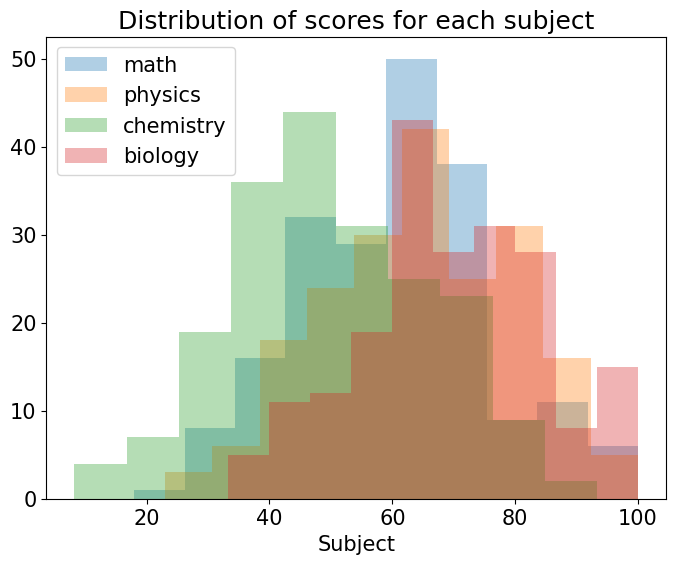

In [41]:
plt.figure(figsize=(8, 6))
for subject in ['math', 'physics', 'chemistry', 'biology']:
    plt.hist(df_scores[subject], alpha=0.35, label=subject)
plt.xlabel("Subject")
plt.legend(loc='best')
plt.title("Distribution of scores for each subject")
plt.show()

## Question : How many students got A is all of the classes? 

## Now let's get practial and work with a real dataset to review what we learned so far.  Let's load the titanic dataset (available in ../data directory) to a pandas data frame 

In [78]:
df_titanic = pd.read_csv("../data/titanic_data.csv") 

Please note that pd.read_csv can take a bunch of paramters depending on the use case.  There are also methods to load data from excel (pd.read_excel(), databases (pd.read_sql()) and other type of files. You should take a look at the pandas documentation to learn more.

Now let's peek through this dataset 

In [43]:
df_titanic.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [44]:
df_titanic.tail(n=3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [79]:
df_titanic.shape
# 891 rows and 12 columns

(891, 12)

In [80]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## HW 
## Describe the data
## Print more info about the data
## How many passengers are there in the dataset? 


## Note that real data in never clean and alot of time is spent on cleaning the data and preparing it for analysis. The Data cleaning/prepping is dependant on the quality of the collected data. Let's see some common data cleaning steps 

* Dealing with Missing Values : Most frequently encountered problem is missing values in the collected data. There are no set methods on how those should be dealt and should be done carefully: 

  * Imputing vs Deleting: We can either impute meaning develop some reasonable guesses for missing data when the percentage of missing data is low. It may not be suitable if the portion of missing data is too high. The other option is to to remove the missing rows/column of data entirely if affordable. When dealing with data that is missing at random, related data can be deleted to reduce bias. You should do what best fits the need with the given situation. 

In [81]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [83]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Lets calculte the % of missing data  

In [47]:
df_titanic.isna().sum()*100/df_titanic.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

so we see that Embarked (port of embarkation) is missing for 0.22 % of the passengers, the age is missing for ~20% and Cabin info is missing for 77 % of the passengers. What do you think will be a good method to deal with these missing values ? 

## Imputation Methods: 

  ### For Numerical Values like age
  
   * Use mean/median/mode of the available values
   * Use forward fill from last available data
   * Interpolate from available values
   
  ### For Categorical Values Cabin/Embarked 
   * can use most frequent categogy to fill


In [48]:
df_titanic['age_avg'] = df_titanic['Age']
df_titanic['age_ffill'] = df_titanic['Age']
df_titanic['age_itp'] = df_titanic['Age']

In [49]:
df_titanic[['Age', 'age_avg', 'age_ffill', 'age_itp']].isna().sum()

Age          177
age_avg      177
age_ffill    177
age_itp      177
dtype: int64

In [50]:
df_titanic['age_avg'].fillna(df_titanic['age_avg'].mean(), inplace=True)
df_titanic['age_ffill'] = df_titanic['age_ffill'].fillna(method ='ffill')
df_titanic['age_itp'] = df_titanic['age_itp'].interpolate(method ='linear')

In [51]:
df_titanic[['Age', 'age_avg', 'age_ffill', 'age_itp']].isna().sum()

Age          177
age_avg        0
age_ffill      0
age_itp        0
dtype: int64

In [52]:
df_titanic[df_titanic['Age'].isna()][['Age', 'age_avg', 'age_ffill',
                                       'age_itp']]

,Age,age_avg,age_ffill,age_itp
5,NaN,29.699118,35.0,44.5
17,NaN,29.699118,2.0,16.5
19,NaN,29.699118,31.0,33.0
26,NaN,29.699118,38.0,28.5
28,NaN,29.699118,19.0,26.0
...,...,...,...,...
859,NaN,29.699118,24.0,32.5
863,NaN,29.699118,48.0,36.0
868,NaN,29.699118,31.0,17.5
878,NaN,29.699118,19.0,37.5


In [53]:
def plot_histograms(df, column_list):
    plt.figure(figsize=(8, 6))
    for column in column_list:
        plt.hist(df_titanic[column], alpha=0.35, label=column)
    plt.xlabel(column_list[0])
    plt.legend(loc='best')
    plt.title(f"Histogram of {column_list[0]}")
    plt.show()

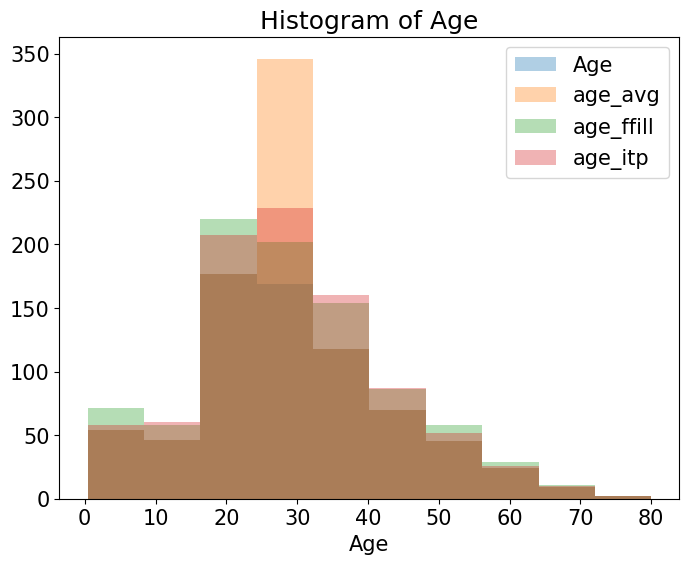

In [54]:
cols_of_interest = ['Age', 'age_avg', 'age_ffill', 'age_itp']

plot_histograms(df_titanic, column_list=cols_of_interest)

* What was the % of male (female) of passengers? 

In [55]:
df_titanic['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [128]:
df_titanic.groupby(['Sex', 'Survived'])['PassengerId'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64

## Finding unique categorical values in a given column 

In [121]:
print(df_titanic['Sex'].unique(), df_titanic['Sex'].nunique())

['male' 'female'] 2


In [85]:
print(df_titanic['Pclass'].unique(), df_titanic['Pclass'].nunique())

[3 1 2] 3


## Questions 

* What fraction of the passengers were children?
* What fraction of passengers died/Survived ?
* What franction of male/female survived ? 
* What was the average age of passsengers that died/Survived ? 
* How many unique Cabin/Parch does this data frame have ?

## I also have a world gdp data in the data folder. You may wish to play around with it to use these skill 


In [96]:
df_gdp = pd.read_csv("../data/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4764766.csv")
df_gdp_meta1 = pd.read_csv("../data/Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4764766.csv")
df_gdp_meta2 = pd.read_csv("../data/Metadata_Indicator_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4764766.csv")

In [97]:
df_gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.310056e+09,2.496648e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.129059e+10,2.180847e+10,2.370702e+10,2.821004e+10,2.611879e+10,2.968217e+10,...,9.839370e+11,1.003679e+12,9.242525e+11,8.823551e+11,1.020647e+12,9.910223e+11,9.975340e+11,9.216459e+11,1.082096e+12,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,...,8.207927e+11,8.649905e+11,7.607345e+11,6.905464e+11,6.837487e+11,7.416899e+11,7.945430e+11,7.844457e+11,8.358084e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.334016e+11,1.372444e+11,8.721929e+10,4.984049e+10,6.897276e+10,7.779294e+10,6.930910e+10,5.361907e+10,7.254699e+10,NaN


In [99]:
df_gdp_meta1.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [100]:
df_gdp_meta1['Region'].unique()

array(['Latin America & Caribbean', nan, 'South Asia',
       'Sub-Saharan Africa', 'Europe & Central Asia',
       'Middle East & North Africa', 'East Asia & Pacific',
       'North America'], dtype=object)

In [101]:
df_gdp_meta2.head()

,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,Unnamed: 4
0,NY.GDP.MKTP.CD,GDP (current US$),GDP at purchaser's prices is the sum of gross ...,"World Bank national accounts data, and OECD Na...",NaN


In [77]:
df_gdp.shape

(266, 67)

In [78]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            133 non-null    float64
 5   1961            135 non-null    float64
 6   1962            137 non-null    float64
 7   1963            137 non-null    float64
 8   1964            137 non-null    float64
 9   1965            148 non-null    float64
 10  1966            151 non-null    float64
 11  1967            155 non-null    float64
 12  1968            160 non-null    float64
 13  1969            160 non-null    float64
 14  1970            169 non-null    float64
 15  1971            172 non-null    float64
 16  1972            172 non-null    float64
 17  1973            172 non-null    flo

In [79]:
df_gdp.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 66'],
      dtype='object')

In [107]:
df_gdp.columns = df_gdp.columns.str.lower().str.replace(' ','_')

In [108]:
df_gdp.columns

Index(['country_name', 'country_code', 'indicator_name', 'indicator_code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'unnamed:_66'],
      dtype='object')

In [109]:
df_nepal = df_gdp[df_gdp['country_name'] == 'Nepal'].T

In [115]:
df_nepal = df_nepal[3:]

In [116]:
df_nepal

,178
1966,906811943.824649
1967,841974025.462659
1968,772228643.405428
1969,788641965.432099
1970,865975308.641975
1971,882765471.604938
1972,1024098804.93827
1973,972101724.995368
1974,1217953546.97604
1975,1575789254.46938
